# Database Administrator Guide

Below is a guide to the initial database schema and table set up, designed to be of assistance to an administrator who may need to learn or edit the database.There are six tables: instrument, detector, pixel, darks, anneal_period and has_properties_in.

The first five tables establish entities and attributes related to them. The last and largest one, has_properties_in, establishes a relationship between anneal_period and pixel and produces they important attributes, stability and darkrate of each pixel over each anneal_period. Because there are so many pixels, the table will grow quite large, with each annealing period adding 1.05 million more records. At creation of the database, there are 200 annealing periods, producing just shy of 210 million records in the has_properties_in table. The expectation that this number will only grow in size was a key factor in the design of this database. The intent, was to build out the other pieces of the database in a streamlined manner. 

In [11]:
import os
import mysql.connector
import pandas as pd
import numpy as np

## Schema and ERD

Here are the initial database schema and ERD.

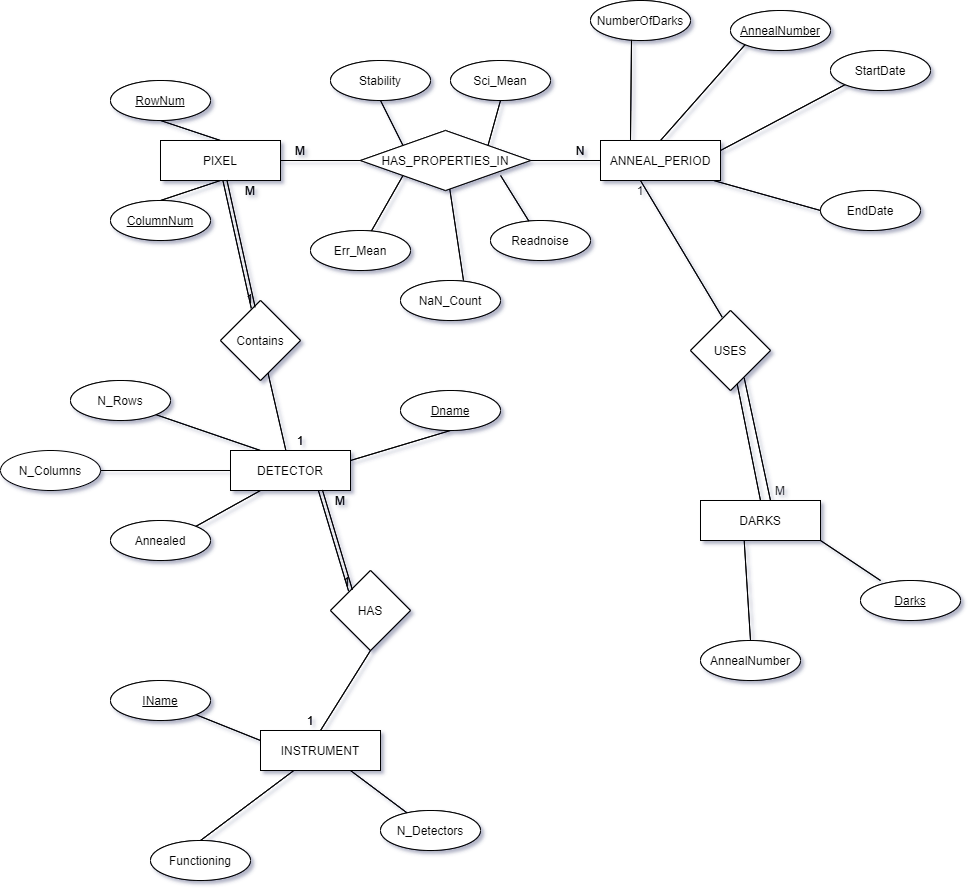

In [1]:
from PIL import Image
ERD = Image.open("pixeldb_ERD.png")
ERD

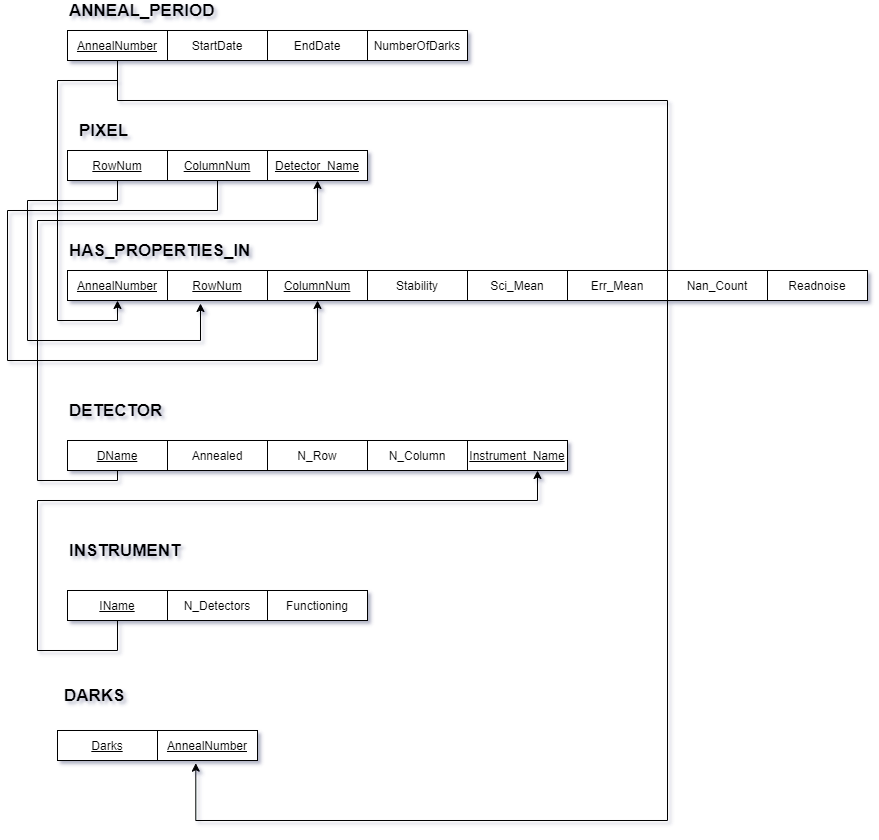

In [2]:
from PIL import Image
schema = Image.open("pixeldb_schema.png")
schema

## Database Tables and Properties

This section provides detailed info on the database tables, including fields, datatypes and primary keys.

In [4]:
connection = mysql.connector.connect(host = 'localhost',
                                    user = 'your_username',
                                    password = 'your_password',
                                    db = 'anneals_pixels',
                                    auth_plugin='mysql_native_password')

In [5]:
connection

In [6]:
pixel_tables = pd.read_sql_query('show tables from anneals_pixels', connection)

In [7]:
pixel_tables

,Tables_in_anneals_pixels
0,anneal_period
1,darks
2,detector
3,has_properties_in
4,instrument
5,pixel


In [8]:
tables = pixel_tables['Tables_in_anneals_pixels']

In [10]:
for table_name in tables:
    output = pd.read_sql_query('Describe {}'.format(table_name), connection)
    print(table_name)
    print(output, '\n')

anneal_period
           Field     Type Null  Key Default Extra
0   AnnealNumber   b'int'   NO  PRI    None      
1      StartDate  b'date'  YES         None      
2        EndDate  b'date'  YES         None      
3  NumberOfDarks   b'int'  YES         None       

darks
          Field            Type Null  Key Default Extra
0         Darks  b'varchar(10)'   NO  PRI    None      
1  AnnealNumber          b'int'  YES  MUL    None       

detector
       Field            Type Null  Key Default Extra
0      DName   b'varchar(8)'   NO  PRI    None      
1   Annealed   b'tinyint(1)'  YES         None      
2     N_Rows          b'int'  YES         None      
3  N_Columns          b'int'  YES         None      
4      IName  b'varchar(10)'  YES  MUL    None       

has_properties_in
          Field             Type Null  Key Default Extra
0  AnnealNumber           b'int'   NO  PRI    None      
1        RowNum           b'int'   NO  PRI    None      
2     ColumnNum           b'int'   NO  P